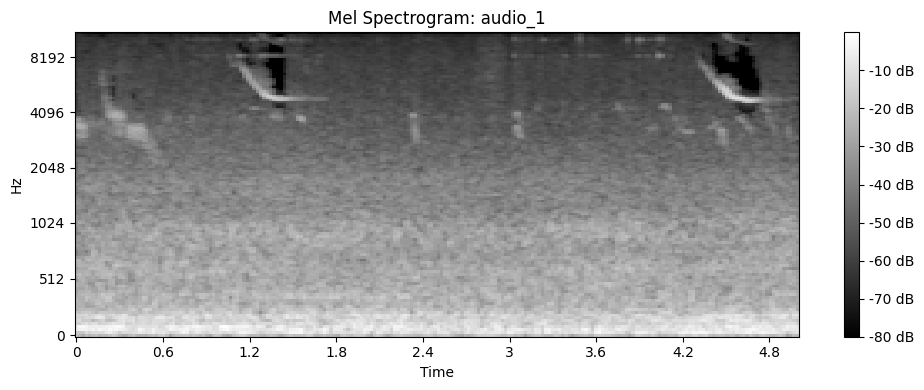

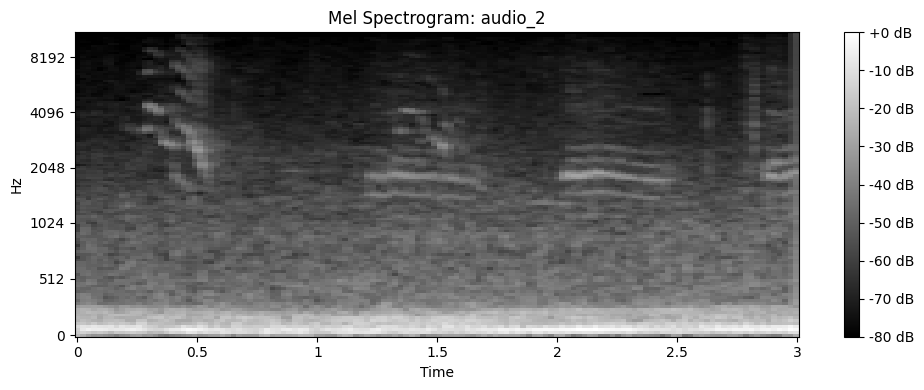

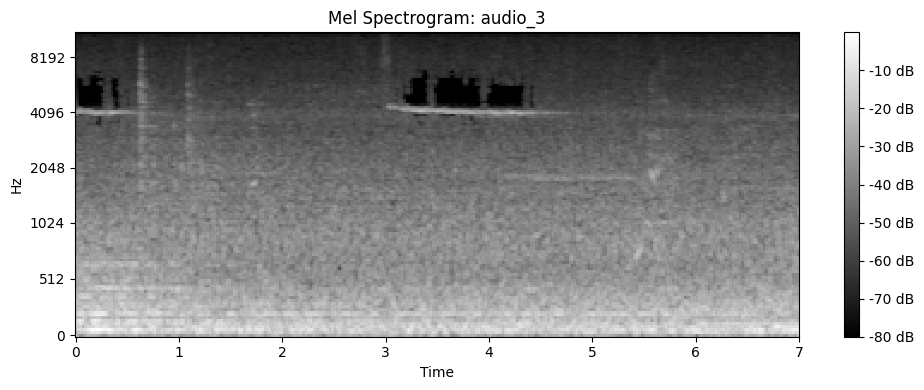

Spectrograms have been saved to D:/University_Course_Work/StatsML-2/Deeplearning/Practical_Home_Work/species_learning_with_deep_learning/Data/test_bird_spectrograms.hdf5


In [1]:
import librosa
import librosa.display
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

mp3_files = [
    r"D:/University_Course_Work/StatsML-2/Deeplearning/Practical_Home_Work/species_learning_with_deep_learning/Data/test1.mp3",
    r"D:/University_Course_Work/StatsML-2/Deeplearning/Practical_Home_Work/species_learning_with_deep_learning/Data/test2.mp3",
    r"D:/University_Course_Work/StatsML-2/Deeplearning/Practical_Home_Work/species_learning_with_deep_learning/Data/test3.mp3"
]

output_h5 = r"D:/University_Course_Work/StatsML-2/Deeplearning/Practical_Home_Work/species_learning_with_deep_learning/Data/test_bird_spectrograms.hdf5"

time_slices = {
    mp3_files[0]: (7, 12),
    mp3_files[1]: (1, 4),
    mp3_files[2]: (6, 13)
}

hop_length = 512
win_length = 2048
sr = 22050

def create_spectrogram(mp3_path, start_time, end_time):
    """
    Extracts a Mel spectrogram in dB scale from a slice of an MP3 file between start_time and end_time.
    """
    y, sr = librosa.load(mp3_path, offset=start_time, duration=end_time - start_time)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=win_length, hop_length=hop_length, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

def save_spectrograms_to_hdf5(mp3_files, time_slices, output_h5):
    """
    Generates Mel spectrograms for specified slices of MP3 files and saves them into an HDF5 file.
    """
    with h5py.File(output_h5, 'w') as h5f:
        for idx, mp3_path in enumerate(mp3_files):
            start_time, end_time = time_slices[mp3_path]
            spectrogram = create_spectrogram(mp3_path, start_time, end_time)
            dataset_name = f"audio_{idx+1}"
            h5f.create_dataset(dataset_name, data=spectrogram)
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=sr, cmap='gray')
            plt.title(f"Mel Spectrogram: {dataset_name}")
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()
            plt.show()

save_spectrograms_to_hdf5(mp3_files, time_slices, output_h5)

print(f"Spectrograms have been saved to {output_h5}")
